<a href="https://colab.research.google.com/github/marianogoes/PCD/blob/main/C%C3%B3digo_Clasificaci%C3%B3n_PF_AA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Librerías utilizadas

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Importar la base de datos

In [110]:
dataset = pd.read_csv('BD_ACP.csv', encoding='latin-1')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[3, 3, 3, ..., 2, 2, 2],
       [3, 3, 3, ..., 2, 3, 3],
       [3, 3, 3, ..., 2, 3, 3],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [3, 2, 2, ..., 3, 2, 2]])

In [111]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df)
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...
29703,1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5
29704,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5
29705,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
29706,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5


## Método Hold out para la creación de la base de prueba

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Método KNN con la base de entrenamiento

Valor óptimo de n_estimators: 29


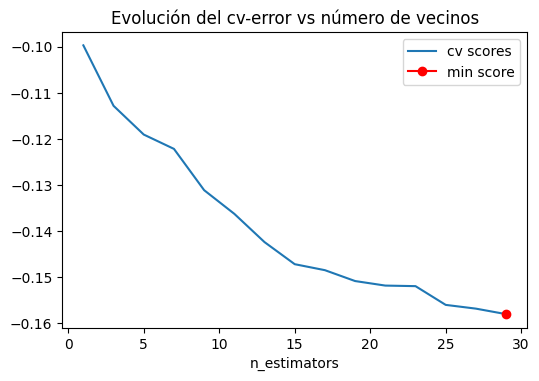

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
train_scores = []
cv_scores    = []
estimator_range = range(1, 30, 2)

for n_estimators in estimator_range:

    modelo = KNeighborsClassifier(n_neighbors = n_estimators, metric = 'minkowski', p = 2)

    # Error de validación cruzada
    scores = cross_val_score( estimator = modelo,X= X_train,y= y_train,scoring   = 'neg_root_mean_squared_error', cv= 5)
    cv_scores.append(scores.mean())

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número de vecinos")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Según el resultado, se alcanza el mejor valor a loas 17 vecinos pero debido a temas de optimización se optará por tomar el valor de 5 que es donde se dobla la gráfica.

In [114]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Matriz de confusión y precisión

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3712   68]
 [  63 5070]]


0.9853023673286211

## Random Forest

###Carga de la base

In [116]:
dataset = pd.read_csv('BD_ACP.csv', encoding='latin-1')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [118]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df)
X

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...
29703,1.0,1.0,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5
29704,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,1.0,0.5,0.5
29705,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
29706,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5


## Método Hold out para la creación de la base de prueba

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Se calcula el mejor parámetro de árboles para Random Forest

Valor óptimo de n_estimators: 26


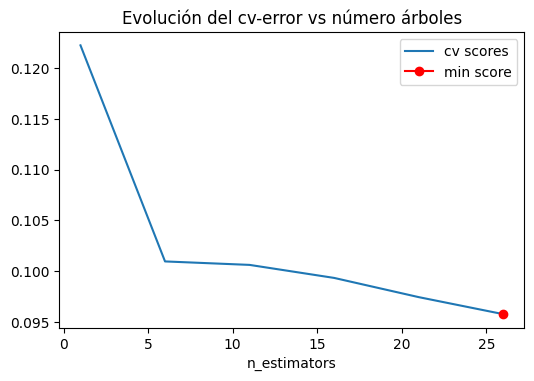

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
train_scores = []
cv_scores    = []
estimator_range = range(1, 30, 5)

for n_estimators in estimator_range:

    modelo = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0)

    # Error de validación cruzada
    scores = cross_val_score( estimator = modelo,X= X_train,y= y_train,scoring   = 'neg_root_mean_squared_error', cv= 5)
    cv_scores.append(-1*scores.mean())

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Aunque se alcanza el mejor valor para n=16, se usarán solamente 6 debido a que es donde se optimiza el resultado considerando la mejora al aumentar el número de árboles

In [122]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Creación de la matriz de confusión y la precisión

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3730   50]
 [  54 5079]]


0.9883316503982946

##Comparación de métodos

In [124]:
KNN_acc=[]
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  KNN_acc.append(accuracy_score(y_test, y_pred))

In [125]:
RF_acc=[]
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  RF_acc.append(accuracy_score(y_test, y_pred))

Prueba de normalidad sobre ambas muestras de resultados

In [126]:
from scipy.stats import shapiro

#perform Shapiro-Wilks test4
stats,p = shapiro(KNN_acc)

print('The Test-Statistic and p-value are as follows: \n Test-Statistic= %.3f, p-value= %.3f'%(stats,p))

stats,p = shapiro(RF_acc)

print('The Test-Statistic and p-value are as follows: \n Test-Statistic= %.3f, p-value= %.3f'%(stats,p))


The Test-Statistic and p-value are as follows: 
 Test-Statistic= 0.979, p-value= 0.806
The Test-Statistic and p-value are as follows: 
 Test-Statistic= 0.966, p-value= 0.435


Como el estadístico de prueba es mayor que 0.05 entonces no se rechaza la hipotesis nula por lo que no hay evidencia suficiente para decir que no proviene de una distribución normal

In [127]:
comparative=np.zeros([30,2])
comparative[:,0]=KNN_acc
comparative[:,1]=RF_acc
comparative

array([[0.9870975 , 0.98979019],
       [0.98676091, 0.98934141],
       [0.98653652, 0.99035117],
       [0.98619993, 0.98990239],
       [0.98563895, 0.98900482],
       [0.98777067, 0.99158532],
       [0.9895658 , 0.9895658 ],
       [0.98597554, 0.98934141],
       [0.98361943, 0.98922922],
       [0.98653652, 0.98878043],
       [0.98294626, 0.99124874],
       [0.98631213, 0.99035117],
       [0.98676091, 0.99001459],
       [0.98687311, 0.99046337],
       [0.98799506, 0.9921463 ],
       [0.98474139, 0.99057556],
       [0.98485358, 0.99192191],
       [0.98754628, 0.99068776],
       [0.98563895, 0.99035117],
       [0.98631213, 0.99113654],
       [0.98563895, 0.9895658 ],
       [0.98664872, 0.9922585 ],
       [0.98552676, 0.98821945],
       [0.98732189, 0.989678  ],
       [0.98586335, 0.99012678],
       [0.98586335, 0.9895658 ],
       [0.98519017, 0.99023898],
       [0.98799506, 0.98900482],
       [0.98619993, 0.99057556],
       [0.98878043, 0.99192191]])

In [128]:
print(np.mean(comparative,0))
print(np.std(comparative,0))

[0.98635701 0.9902315 ]
[0.00135956 0.00102417]


In [129]:
#t-student
from scipy import stats
stats2, p =stats.ttest_ind(KNN_acc, RF_acc)
print('The Test-Statistic and p-value are as follows: \n Test-Statistic= %.3f, p-value= %.3f'%(stats2,p))

The Test-Statistic and p-value are as follows: 
 Test-Statistic= -12.258, p-value= 0.000


In [130]:
#Wilcoxon test
from scipy.stats import ranksums
stats2, p =ranksums(KNN_acc, RF_acc)
print('The Test-Statistic and p-value are as follows: \n Test-Statistic= %.3f, p-value= %.3f'%(stats2,p))

# A p-value of less than 0.05 indicates that this test rejects the hypothesis at the 5% significance level.

The Test-Statistic and p-value are as follows: 
 Test-Statistic= -6.505, p-value= 0.000


Como el estadístico de prueba es mayor que 0.05 entonces no se rechaza la hipotesis nula por lo que no hay evidencia suficiente para afirmar que hay diferencia entre ambos grupos, es decir no hay diferencia estadística entre las medias de cada grupo